In [56]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [57]:
# Load and print the data to be familiar with it
data = pd.read_csv('AAPL hist.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1990-02-01,0.308036,0.309152,0.299107,0.300223,0.239108,117073600
1,1990-02-02,0.296875,0.310268,0.296875,0.305804,0.243553,118473600
2,1990-02-05,0.305804,0.314732,0.303571,0.312500,0.248886,101752000
3,1990-02-06,0.310268,0.312500,0.303571,0.310268,0.247109,73920000
4,1990-02-07,0.294643,0.303571,0.290179,0.296875,0.236442,312446400
...,...,...,...,...,...,...,...
8308,2023-01-25,140.889999,142.429993,138.809998,141.860001,141.860001,65799300
8309,2023-01-26,143.169998,144.250000,141.899994,143.960007,143.960007,54105100
8310,2023-01-27,143.160004,147.229996,143.080002,145.929993,145.929993,70492800
8311,2023-01-30,144.960007,145.550003,142.850006,143.000000,143.000000,64015300


(8313,)

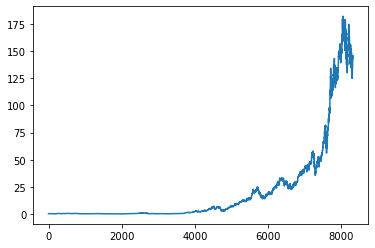

In [58]:
# plot the clsoing price of AAPL over time.
data['Close'].plot()
data['Close'].shape

In [59]:
#create an index column
data = data.reset_index()
x = np.array(data.index).reshape(-1,1)
y = data['Close']
data.head()

,index,Date,Open,High,Low,Close,Adj Close,Volume
0,0,1990-02-01,0.308036,0.309152,0.299107,0.300223,0.239108,117073600
1,1,1990-02-02,0.296875,0.310268,0.296875,0.305804,0.243553,118473600
2,2,1990-02-05,0.305804,0.314732,0.303571,0.312500,0.248886,101752000
3,3,1990-02-06,0.310268,0.312500,0.303571,0.310268,0.247109,73920000
4,4,1990-02-07,0.294643,0.303571,0.290179,0.296875,0.236442,312446400


In [60]:
#Perform the linear regression model uscing Scikit Learn
reg = LinearRegression().fit(x,y)
reg.score(x,y)
predictions = reg.predict(x)

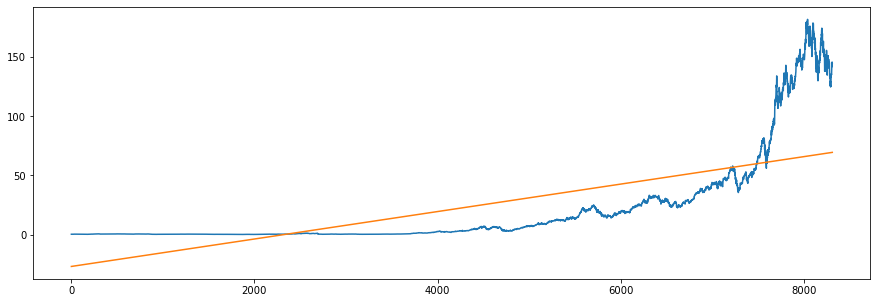

In [61]:
# Plot the predicted values compared with the historical data
plt.figure(figsize=(15,5))
plt.plot(data['Close'])
plt.plot(data.index, predictions)

In [62]:
# Print the efficiency of the model
print('R^2:', linreg.score(x, y))

R^2: 0.512495416536662


# Compare the score of Linear Regression with Polynomial Regression

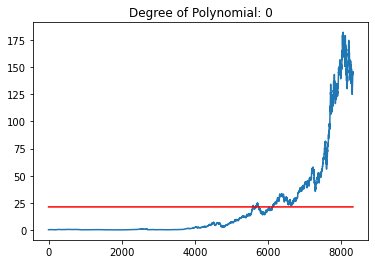

R^2: 0.0
Reg coefficient: [0.]
Reg Intercept: 21.28586753470468


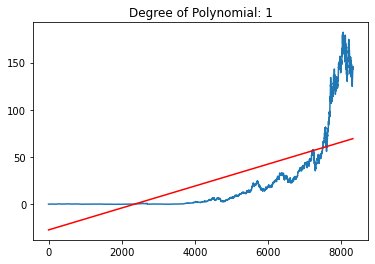

R^2: 0.512495416536662
Reg coefficient: [0.         0.01160483]
Reg Intercept: -26.94382279375526


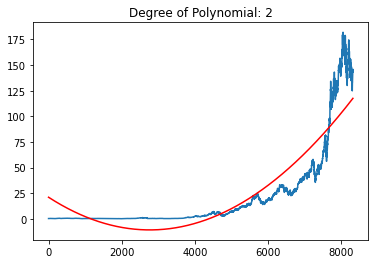

R^2: 0.817420537764906
Reg coefficient: [ 0.00000000e+00 -2.30595861e-02  4.17040666e-06]
Reg Intercept: 21.072176573334886


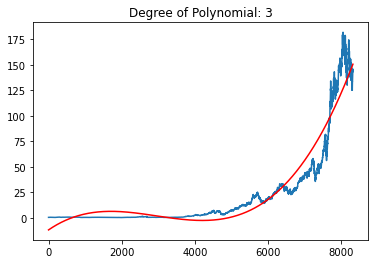

R^2: 0.9209848484379842
Reg coefficient: [ 0.00000000e+00  2.47382315e-02 -1.02066064e-05  1.15311301e-09]
Reg Intercept: -12.025820473189768


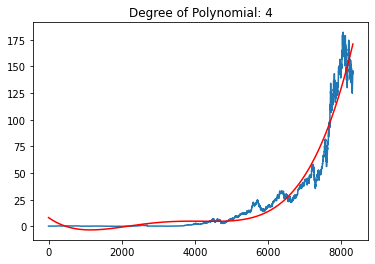

R^2: 0.9513757588053218
Reg coefficient: [ 0.00000000e+00 -2.41816531e-02  1.62821156e-05 -3.80432285e-09
  2.98208868e-13]
Reg Intercept: 8.290438767116896


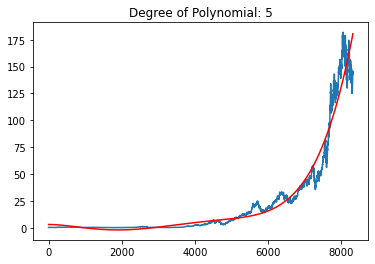

R^2: 0.9587118721945711
Reg coefficient: [ 0.00000000e+00 -6.17873973e-09 -6.30881219e-06  3.87132109e-09
 -7.79250006e-13  5.31760208e-17]
Reg Intercept: 3.06099145049167


In [118]:
m = range(6)

for i in range(6):
    poly_features = PolynomialFeatures(degree=i)
    x_poly = poly_features.fit_transform(x)
    reg = LinearRegression()
    reg.fit(x_poly, y)
    y_pred = reg.predict(x_poly)
    plt.plot(x, y)
    plt.plot(x, y_pred, color='red')
    plt.title(f'Degree of Polynomial: {i}')
    plt.show()
    print('R^2:', reg.score(x_poly, y))
    print('Reg coefficient:', reg.coef_)
    print('Reg Intercept:', reg.intercept_)

